In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

In [7]:
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # For displaying Chinese labels
plt.rcParams['axes.unicode_minus'] = False  

In [8]:
# Define Taiwan ETF tickers (Yahoo Finance format: add .TW)
etf_list = {
    '0050.TW': '元大台灣50',
    '0056.TW': '元大高股息',
    '006208.TW': '富邦台50',
    '00692.TW': '富邦公司治理',
    '00878.TW': '國泰永續高股息',
    '00891.TW': '中信關鍵半導體' }

# Define date range (last 3 years)
end_date = datetime.now()
start_date = end_date - timedelta(days=3 * 365)

In [9]:
etf_data = {}

for ticker, name in etf_list.items():
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        if not data.empty:
            etf_data[name] = data
            print(f"Downloaded data for {name} ({ticker})")
        else:
            print(f"No data for {name} ({ticker})")
    except Exception as e:
        print(f"Error downloading {name} ({ticker}): {e}")

/var/folders/df/yqwxdyg10pq3_qy4b7482c_c0000gn/T/ipykernel_60519/798505412.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/df/yqwxdyg10pq3_qy4b7482c_c0000gn/T/ipykernel_60519/798505412.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


Downloaded data for 元大台灣50 (0050.TW)


[*********************100%***********************]  1 of 1 completed
/var/folders/df/yqwxdyg10pq3_qy4b7482c_c0000gn/T/ipykernel_60519/798505412.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


Downloaded data for 元大高股息 (0056.TW)


[*********************100%***********************]  1 of 1 completed
/var/folders/df/yqwxdyg10pq3_qy4b7482c_c0000gn/T/ipykernel_60519/798505412.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


Downloaded data for 富邦台50 (006208.TW)


[*********************100%***********************]  1 of 1 completed
/var/folders/df/yqwxdyg10pq3_qy4b7482c_c0000gn/T/ipykernel_60519/798505412.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


Downloaded data for 富邦公司治理 (00692.TW)


[*********************100%***********************]  1 of 1 completed
/var/folders/df/yqwxdyg10pq3_qy4b7482c_c0000gn/T/ipykernel_60519/798505412.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)


Downloaded data for 國泰永續高股息 (00878.TW)


[*********************100%***********************]  1 of 1 completed

Downloaded data for 中信關鍵半導體 (00891.TW)


In [20]:
#Calculate Daily Returns

returns_data = {}

for name, data in etf_data.items():
    if not data.empty and 'Close' in data.columns and len(data) > 1:
        daily_returns = data['Close'].pct_change().dropna()
        daily_returns.index = pd.to_datetime(daily_returns.index)
        daily_returns.name = name
        returns_data[name] = daily_returns
    else:
        print(f"Skipping {name}: missing or invalid data.")

In [21]:

returns_df = pd.concat(returns_data.values(), axis=1)
returns_df.columns = list(returns_data.keys())
returns_df.head()

,元大台灣50,元大高股息,富邦台50,富邦公司治理,國泰永續高股息,中信關鍵半導體
Date,,,,,,
2022-06-28,-0.009508,-0.011434,-0.007194,-0.007094,-0.005810,-0.020358
2022-06-29,-0.008347,-0.013670,-0.010145,-0.009094,-0.005260,-0.013300
2022-06-30,-0.025252,-0.020611,-0.022694,-0.024582,-0.021152,-0.032014
2022-07-01,-0.036701,-0.027213,-0.034457,-0.028226,-0.016206,-0.046997
2022-07-04,-0.009861,-0.004849,-0.012413,-0.012102,-0.002441,-0.007306


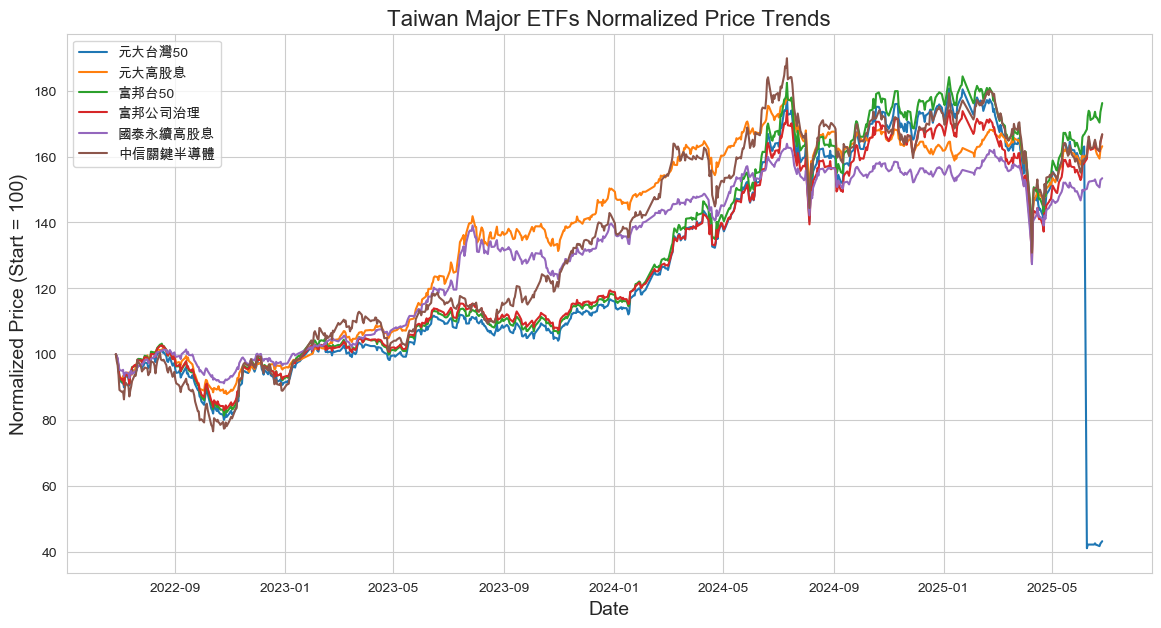

In [23]:
#Plot Normalized Price Trends

plt.figure(figsize=(14, 7))

for name, data in etf_data.items():
    if not data.empty:
        normalized_price = data['Close'] / data['Close'].iloc[0] * 100
        plt.plot(normalized_price.index, normalized_price, label=name)

plt.title('Taiwan Major ETFs Normalized Price Trends', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Normalized Price (Start = 100)', fontsize=14)
plt.legend()
plt.grid(True)

In [27]:
# Annualized Return, Volatility & Sharpe Ratio

annual_returns = returns_df.mean() * 245 * 100 #245 = average trading days in a year
annual_volatility = returns_df.std() * np.sqrt(45) * 100
sharpe_ratio = annual_returns / annual_volatility

performance_df = pd.DataFrame({
    'Annual Return (%)': annual_returns,
    'Annual Volatility (%)': annual_volatility,
    'Sharpe Ratio': sharpe_ratio })

performance_df

,Annual Return (%),Annual Volatility (%),Sharpe Ratio
元大台灣50,-4.426463,21.030473,-0.210479
元大高股息,17.996911,7.335011,2.453563
富邦台50,21.532589,9.383821,2.294650
富邦公司治理,19.372420,8.838296,2.191873
國泰永續高股息,15.702688,6.768650,2.319914
中信關鍵半導體,20.383779,10.686311,1.907466


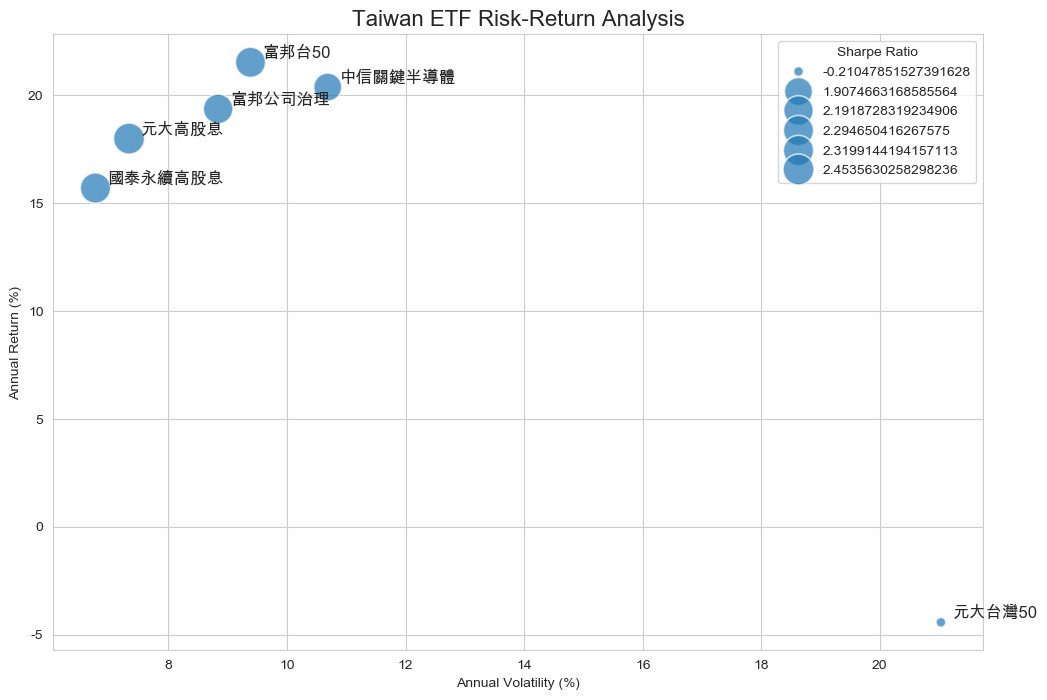

In [28]:
#Risk vs Return Scatter Plot

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Annual Volatility (%)',
    y='Annual Return (%)',
    size='Sharpe Ratio',
    sizes=(50, 500),
    alpha=0.7,
    data=performance_df)

for idx, row in performance_df.iterrows():
    plt.annotate(idx, (row['Annual Volatility (%)'] + 0.2, row['Annual Return (%)'] + 0.2), fontsize=12)

plt.title('Taiwan ETF Risk-Return Analysis', fontsize=16)
plt.grid(True)

Text(0.5, 1.0, 'Taiwan ETF Return Correlation')

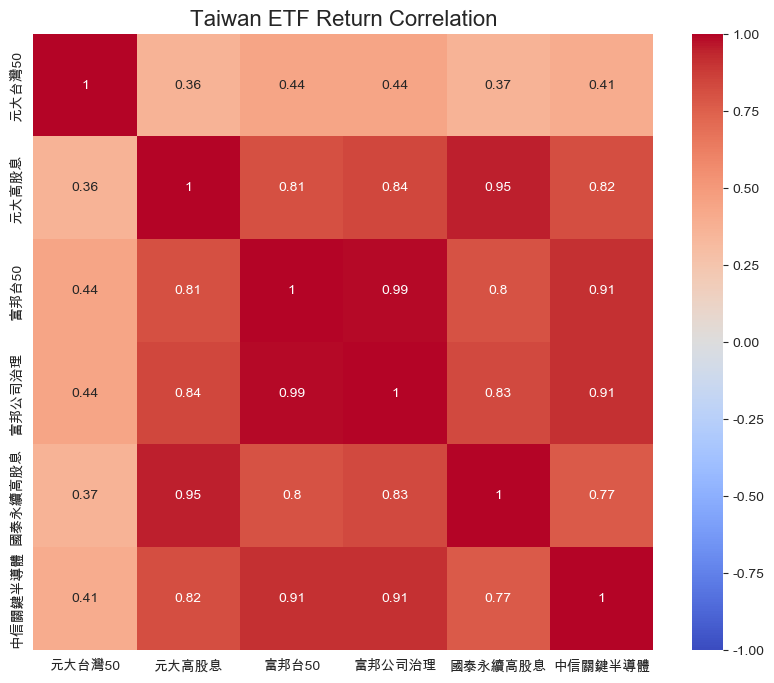

In [29]:
#Correlation Heatmap

plt.figure(figsize=(10, 8))
correlation_matrix = returns_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Taiwan ETF Return Correlation', fontsize=16)

In [35]:
performance_df.to_csv('taiwan_etf_performance.csv')
print("Results saved to taiwan_etf_performance.csv")

Results saved to taiwan_etf_performance.csv


## Which ETFs performed the best? 
- 富邦台50 has the highest return.

## Is there a clear risk-return tradeoff? 
- Yes, ETFs with higher volatility tend to have higher returns.

## What does the correlation heatmap say about diversification? 
- Most ETFs are highly correlated, which means that there's limited diversification benefit if you hold many of them. 

## Any visible seasonality?
- All ETFs drop sharply around 2024 august and 2025 april. This is due to:

On August 5, 2024, the Taiwan stock market suffered its largest single-day drop in history, with the TAIEX falling 8.35% (a loss of over 1,800 points). This is becsuse sising fears of a U.S. economic recession, triggered by weak July employment data and rising unemployment, which hurt global investor confidence.

In April 2025, Taiwan’s stock market plunged again, especially on April 7, when the TAIEX fell 9.7% (over 2,065 points), setting a new historical record for both percentage and point decline. This is because U.S. President Trump announced a "reciprocal tariff" policy, with potential tariffs up to 32% on Taiwanese exports, sparking fears of a trade war and sharply damaging market sentiment.